In [1]:
import numpy as np
from gibbs_sampler import GibbsSampler
from data_generation_normal import DataGenerator
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
n_cells = 100
n_cell_types = 3
n_genes = 4
K = 6
epsilon = 4

In [3]:
np.random.seed(2)
dg = DataGenerator(n_cells, n_cell_types, n_genes, K, epsilon)

#plt.scatter(*expression.T[0:2], c=dg.cell_types)

In [4]:
sampler = GibbsSampler(n_cells, n_cell_types, n_genes, 10, 1, epsilon, dg.graph, dg.graph_reversed)

In [17]:
L = 20
histogram = np.zeros((4,L+1))

In [25]:
def sample(sampler, exp, n_samples = 10):
    res = defaultdict(list)
    for _ in range(n_samples):
        sampler.reset()
        sampler.train(75 exp)
        res["rho"].append(sampler.rho)
        res["beta"].append(sampler.beta)
        res["z"].append(sampler.Z)
        res["pi"].append(sampler.pi)
    for k in res:
        res[k] = np.array(res[k])
    return res

SyntaxError: invalid syntax (<ipython-input-25-e73e75833979>, line 5)

In [26]:
for i in range(15):
    expression = dg.generate_gene_expression(epsilon, n_cells)
    samples = sample(sampler, expression, L)
    rho_inf = samples["rho"] < dg.perturbation[None,:]
    rho_rank = rho_inf.sum(axis = 0)
    for v,c in zip(*np.unique(rho_rank, return_counts = True)):
        histogram[0][v]+=c
    beta_inf = samples["beta"] < dg.initial_cell_carac[None,:]
    beta_rank = beta_inf.sum(axis = 0)
    for v,c in zip(*np.unique(beta_rank, return_counts = True)):
        histogram[1][v]+=c
    z_inf = samples["z"] < dg.cell_types[None,:]
    z_rank = z_inf.sum(axis = 0)
    for v,c in zip(*np.unique(z_rank, return_counts = True)):
        histogram[2][v]+=c
    pi_inf = samples["pi"] < dg.pi[None,:]
    pi_rank = pi_inf.sum(axis = 0)
    for v,c in zip(*np.unique(beta_rank, return_counts = True)):
        histogram[3][v]+=c
    
    print("epoch",i)

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14


<BarContainer object of 21 artists>

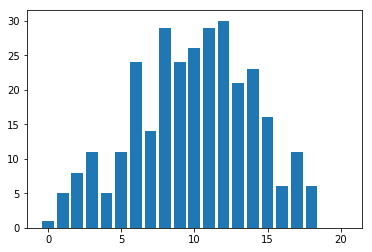

In [31]:
plt.bar(np.arange(L+1), histogram[3])

In [ ]:
histogram